In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv(r'.\googleplaystore.csv')

# Filter only games
games_df = df[df['Category'] == 'GAME'].copy()

In [2]:
# Drop rows with missing 'Rating' or 'Installs'
games_df = games_df.dropna(subset=['Rating', 'Installs'])


# Clean 'Size' (convert to megabytes)
def clean_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert KB to MB
    else:
        return np.nan

games_df['Size'] = games_df['Size'].apply(clean_size).dropna()

# Clean 'Price' (remove '$' and convert to float)
games_df['Price'] = (
    games_df['Price']
    .str.replace('$', '')
    .astype(float)
)

# Drop remaining rows with missing values
games_df = games_df.dropna()

In [3]:
# Select features for clustering
#features = ['Rating', 'Installs', 'Reviews', 'Size', 'Price']
features = ['Size', 'Rating']
X = games_df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Engineer\AppData\Local\Temp\ipykernel_14752\657708419.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


NameError: name 'kmeans' is not defined

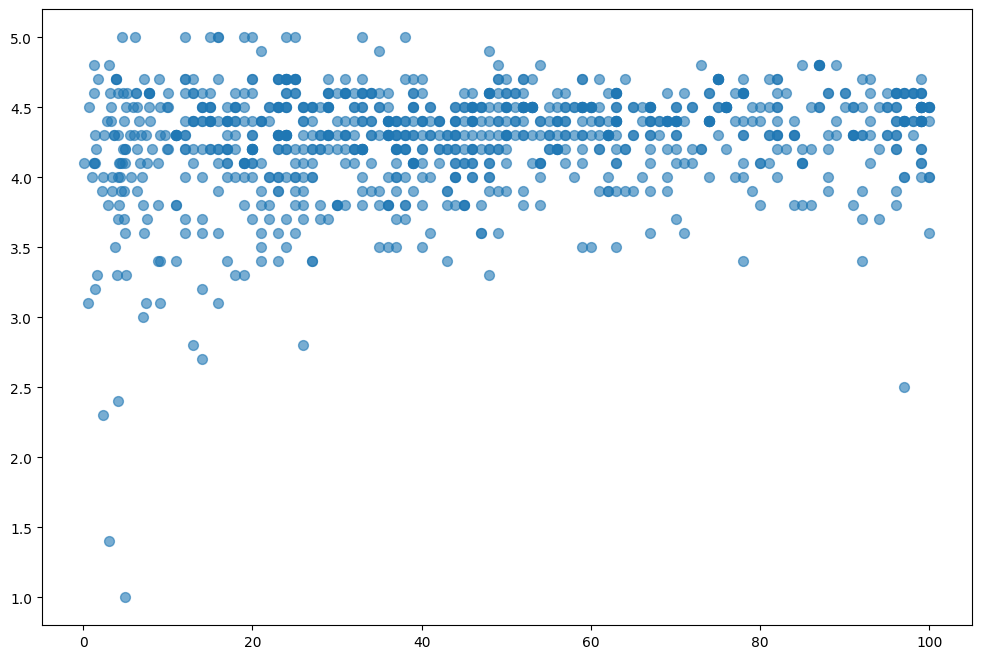

In [4]:

plt.figure(figsize=(12, 8))

# Create scatter plot with cluster colors
scatter = plt.scatter(
    games_df['Size'],          # X-axis: Rating
    games_df['Rating'],        # Y-axis: Installs (log scale for better visibility)
    #c=games_df['Cluster'],       # Color by cluster
    cmap='viridis',              # Color map
    alpha=0.6,                   # Transparency
    s=50                         # Marker size
)

# Add cluster centroids (unscaled for interpretability)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],             # X: Rating (original scale)
    centroids[:, 1],             # Y: Installs (original scale)
    s=200,                       # Larger marker for centroids
    #marker='X',                  # Marker shape
    c='red',                     # Color
    edgecolor='black',           # Outline
    #label='Centroids'
)

# Customize plot
plt.title('Google Play Games Clustering (Size vs. Rating)', fontsize=14)
plt.xlabel('Size (MB)', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
#plt.yscale('log')  # Use log scale for installs (to handle large ranges)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

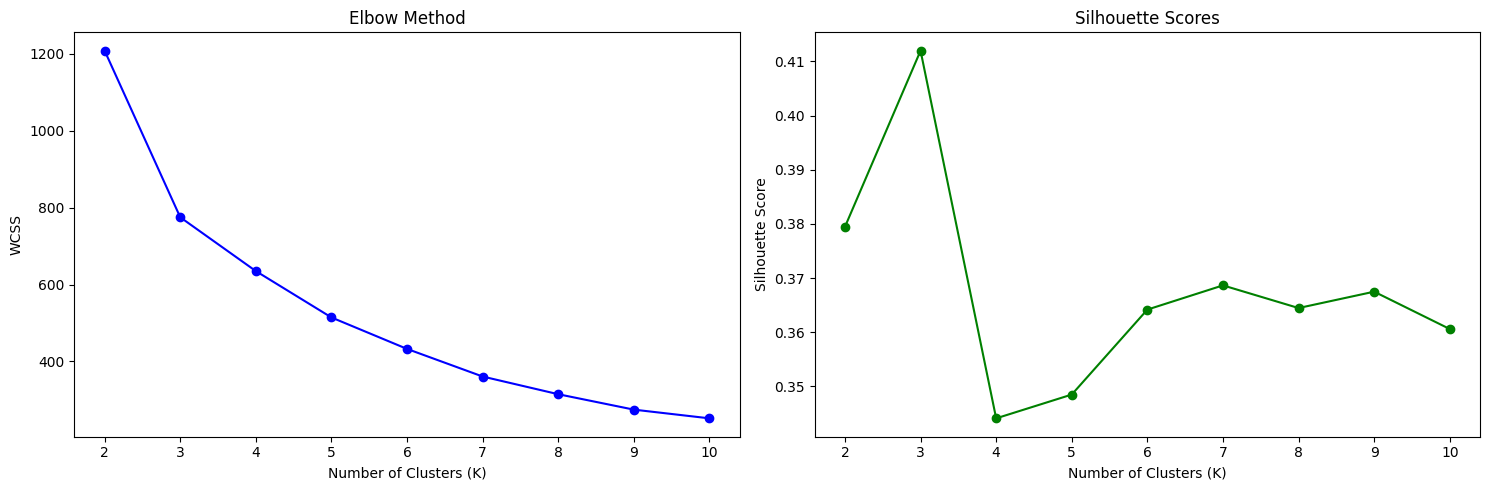

In [5]:
k_values = range(2, 11)
wcss = []           # Within-cluster sum of squares
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

# Plot results
plt.figure(figsize=(15, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [6]:
# Choose optimal K (e.g., K=4 based on plots)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
games_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster centers (unscaled for interpretation)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers (Original Scale):")
print(cluster_centers_df)



Cluster Centers (Original Scale):
        Size    Rating
0  27.625225  3.560484
1  27.421876  4.372314
2  75.038251  4.373770


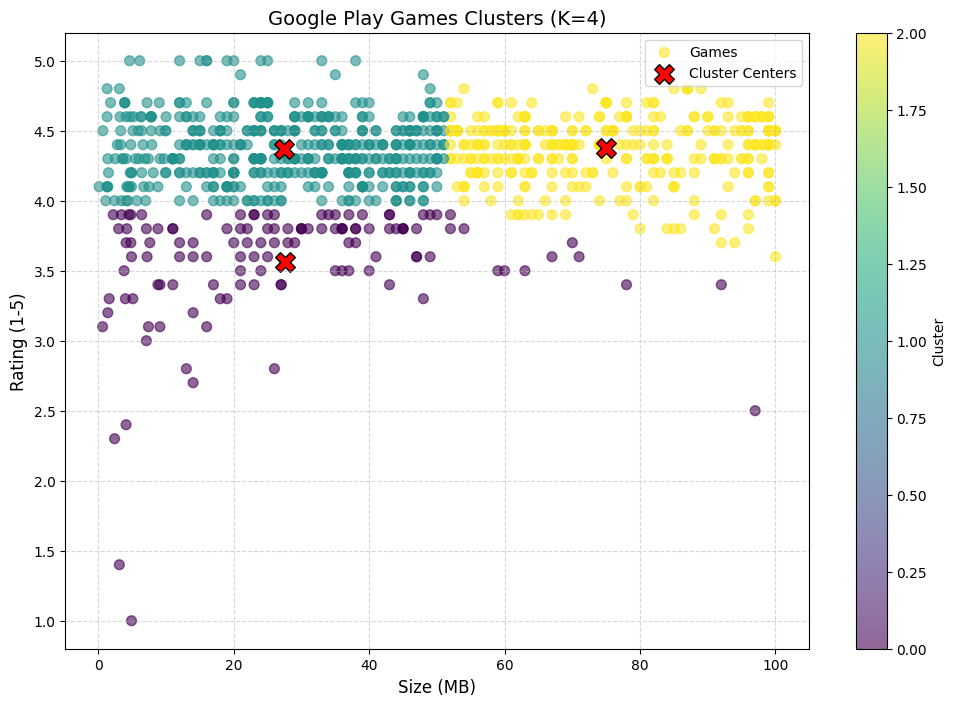

In [7]:
plt.figure(figsize=(12, 8))

# Scatter plot of data points (with cluster colors)
scatter = plt.scatter(
    games_df['Size'],          # X-axis: Rating (original scale)
    games_df['Rating'],        # Y-axis: Installs (original scale, log-transformed for visibility)
    c=games_df['Cluster'],       # Color by cluster labels
    cmap='viridis',              # Color map
    alpha=0.6,                   # Transparency
    s=50,                        # Marker size
    label='Games'
)

# Plot cluster centroids (unscaled)
plt.scatter(
    cluster_centers_df['Size'],  # X: Centroid ratings
    cluster_centers_df['Rating'], # Y: Centroid installs
    s=200,                         # Marker size
    marker='X',                     # Marker style
    c='red',                       # Color
    edgecolor='black',             # Outline color
    label='Cluster Centers'
)

# Customize plot
plt.title('Google Play Games Clusters (K=4)', fontsize=14)
plt.xlabel('Size (MB)', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
#plt.yscale('log')  # Log scale for installs (to handle large ranges)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()